In [1]:
# Load required libraries
library(readr)
library(ggplot2)
library(R6)

In [2]:
CurveFitting <- R6Class("CurveFitting",

  public = list(
    xs  = NULL, ys  = NULL,
    lm1 = NULL, lm2 = NULL, lm3 = NULL,
    xp  = NULL, yp1 = NULL, yp2 = NULL, yp3 = NULL,

    initialize = function(xs, ys) {
      self$xs <- xs
      self$ys <- ys
    },

    generate_regressions = function() {
      # Keep the variable name for data frame
      x_values <- self$xs
    
      # Independent x values.
      self$xp <- seq(
        min(x_values), max(x_values),
        length.out = 100)

      # Generate values for the linear regression
      self$lm1 <- lm(self$ys ~
        poly(x_values, 1, raw = TRUE))
      self$yp1 <- predict(self$lm1,
        newdata = data.frame(x_values = self$xp))

      # Generate values for the quadratic regression
      self$lm2 <- lm(self$ys ~
        poly(x_values, 2, raw = TRUE))
      self$yp2 <- predict(self$lm2,
        newdata = data.frame(x_values = self$xp))

      # Generate values for the cubic regression
      self$lm3 <- lm(self$ys ~
        poly(x_values, 3, raw = TRUE))
      self$yp3 <- predict(self$lm3,
        newdata = data.frame(x_values = self$xp))
    },

    show_coeff = function(order, lm_model) {
      # Define a named vector
      # to map order numbers to curve types
      coeff_text <- c(
        "(a, b)" = 1, "(a, b, c)" = 2,
        "(a, b, c, d)" = 3)
      order_text <- c(
        "Linear" = 1, "Quadratic" = 2, "Cubic" = 3)

      # Print the curve type
      cat(paste("Using lm_model :",
        names(order_text)[order], "\n"))

      # Coefficients
      coefficients <- coef(lm_model)

      # Reverse order to match output
      coefficients <- coefficients[
        length(coefficients):1]

      # Print coefficients
      cat("Coefficients ",
        names(coeff_text)[order], ":\n\t",
        coefficients, "\n")
    },

    show_coeffs = function() {
      self$show_coeff(1, self$lm1)
      self$show_coeff(2, self$lm2)
      self$show_coeff(3, self$lm3)
    },

    create_plot = function() {
      # Plot data points
      plot(self$xs, self$ys,
        col = "black", pch = 20,
        xlab = "x", ylab = "y",
        main = "Polynomial Curve Fitting")

      # Plot regression lines
      lines(self$xp, self$yp1, col = "red", lwd = 2)
      lines(self$xp, self$yp2, col = "green", lwd = 2)
      lines(self$xp, self$yp3, col = "blue", lwd = 2)

      # Add legend
      legend("topright",
         legend = c("Data Points", "Linear Equation",
                    "Quadratic Curve", "Cubic Curve"),
         col = c("black", "red", "green", "blue"),
         pch = c(20, NA, NA, NA), lwd = c(NA, 2, 2, 2))
    }
  )
)

In [3]:
# Read data from CSV file
series <- read_csv(
  "series.csv",
  show_col_types = FALSE)

Using lm_model : Linear 
Coefficients  (a, b) :
	 306 -721 
Using lm_model : Quadratic 
Coefficients  (a, b, c) :
	 39 -162 137 
Using lm_model : Cubic 
Coefficients  (a, b, c, d) :
	 2 3 4 5 


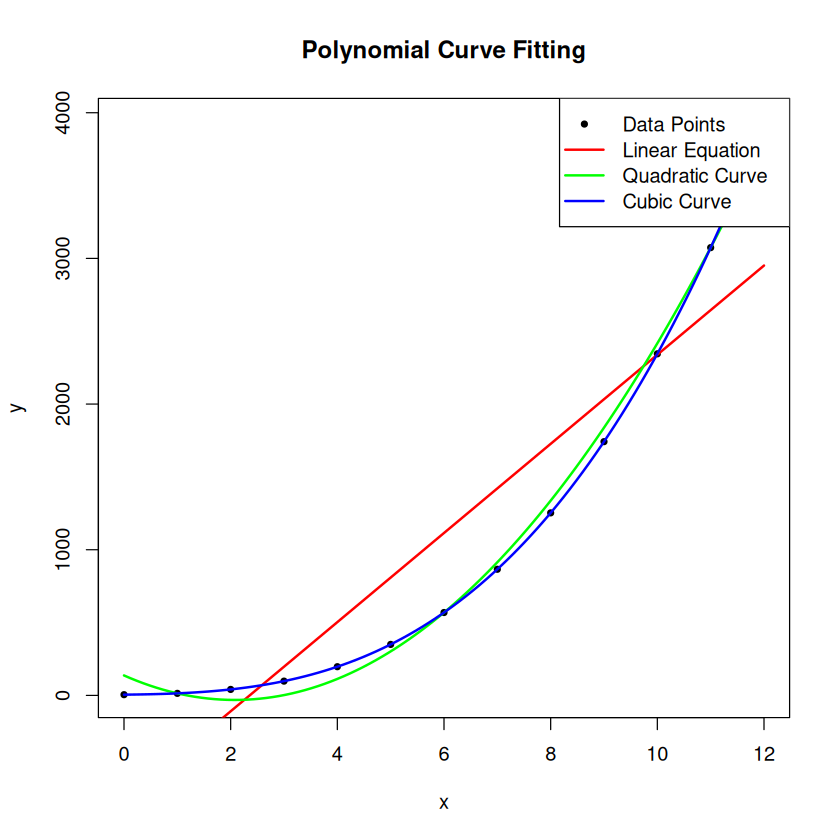

In [4]:
# Create CurveFitting object
# Perform linear regression, display, and plot
curve_fitting <- CurveFitting$new(
  series$xs, series$ys3)
curve_fitting$generate_regressions()
curve_fitting$show_coeffs()
curve_fitting$create_plot()